<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#reproducing-the-error-with-fake-data" data-toc-modified-id="reproducing-the-error-with-fake-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>reproducing the error with fake data</a></span><ul class="toc-item"><li><span><a href="#Error-also-there-with-xarray" data-toc-modified-id="Error-also-there-with-xarray-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Error also there with xarray</a></span></li><li><span><a href="#Why?-Diagnostics-of-the-error" data-toc-modified-id="Why?-Diagnostics-of-the-error-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Why? Diagnostics of the error</a></span></li></ul></li><li><span><a href="#Temporary-fix" data-toc-modified-id="Temporary-fix-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Temporary fix</a></span><ul class="toc-item"><li><span><a href="#General-approach-from-the-webpage-above" data-toc-modified-id="General-approach-from-the-webpage-above-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>General approach from the webpage above</a></span></li></ul></li><li><span><a href="#Specifying-extent-manually?" data-toc-modified-id="Specifying-extent-manually?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Specifying extent manually?</a></span><ul class="toc-item"><li><span><a href="#specifying-the-extent-manually" data-toc-modified-id="specifying-the-extent-manually-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>specifying the extent manually</a></span></li><li><span><a href="#what-happens-with-using-cartopy-plotting" data-toc-modified-id="what-happens-with-using-cartopy-plotting-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>what happens with using cartopy plotting</a></span></li></ul></li></ul></div>

# Read Me

Notebook to dig deeper into the interpolation difference between various plotting functions

# Imports

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from IPython.display import Image
%matplotlib inline

/home/mali/anaconda3/envs/work_env_climpa40/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# Creating fake data

In [2]:
lats_f = np.linspace(30.0, 70.8, num=409, endpoint=True)
lons_f = np.linspace(-10, 37.0, 471, endpoint=True)
data_f = 2.5 * np.random.randn(409, 471) + 3
da_f = xr.DataArray(data_f, coords=[lats_f, lons_f], dims=['lat', 'lon'])
da_f

<xarray.DataArray (lat: 409, lon: 471)>
array([[ 1.812287, -0.079017,  8.873518, ...,  5.898189,  7.391724,  5.449904],
       [ 9.278361,  1.262247,  4.773331, ...,  7.733573,  5.784486,  2.539216],
       [ 4.442303, -1.040839,  4.230015, ...,  5.373082,  3.111453,  0.815868],
       ...,
       [ 1.684867, -0.97674 ,  7.533342, ..., -2.372441,  4.533274, -2.626284],
       [ 4.440041,  3.189782,  0.636245, ...,  2.348332,  5.061739,  1.288742],
       [ 3.650653, -1.865403,  6.423797, ...,  3.770931,  3.29412 ,  1.56255 ]])
Coordinates:
  * lat      (lat) float64 30.0 30.1 30.2 30.3 30.4 ... 70.4 70.5 70.6 70.7 70.8
  * lon      (lon) float64 -10.0 -9.9 -9.8 -9.7 -9.6 ... 36.7 36.8 36.9 37.0

# reproducing the error with fake data

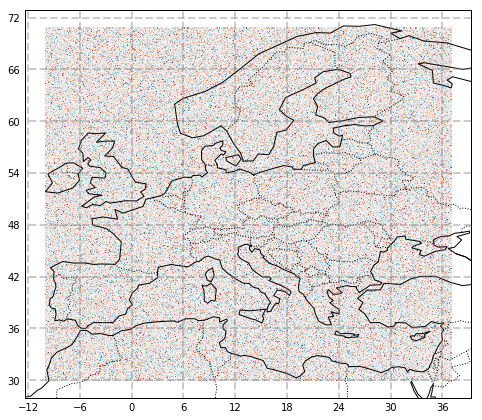

In [8]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())

#setting geographical boundaries of our map using the data provided
#ax.set_extent([min(da_f.lon), max(da_f.lon), min(da_f.lat), 70.0])
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.4, linestyle='--')
gl.xlabels_top = False # suppress gridline labels on the top
gl.ylabels_right = False # suppress gridline labels at the right edge


p = ax.pcolormesh(lons_f, lats_f, data_f, transform=ccrs.PlateCarree(), cmap='RdBu_r') 
#p = ax.contourf(lons_f, lats_f, data_f, transform=ccrs.PlateCarree(), cmap='RdBu_r')

## Error also there with xarray plotting API

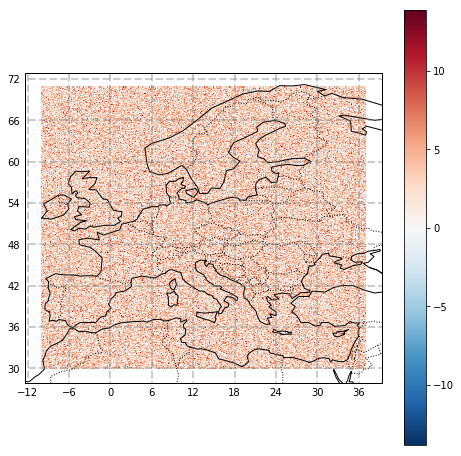

In [10]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())

#setting geographical boundaries of our map using the data provided
#ax.set_extent([min(da_f.lon), max(da_f.lon), min(da_f.lat), max(da_f.lat)])
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.4, linestyle='--')
gl.xlabels_top = False # suppress gridline labels on the top
gl.ylabels_right = False # suppress gridline labels at the right edge

da_f.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree()) 

## Why? Diagnostics of the error

In [10]:
def sample_data_map(nlons, nlats):
    """Returns `lons`, `lats`, and fake `data`
    adapted from:
    http://scitools.org.uk/cartopy/docs/v0.15/examples/axes_grid_basic.html
    """
    
    dlat = 180. / nlats / 2
    dlon = 360. / nlons

    lat = np.linspace(-90 + dlat, 90 - dlat, nlats)   
    lon = np.linspace(0, 360 - dlon, nlons)

    lons, lats = np.meshgrid(np.deg2rad(lon), np.deg2rad(lat))
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)
    data = wave + mean
    
    return lon, lat, data

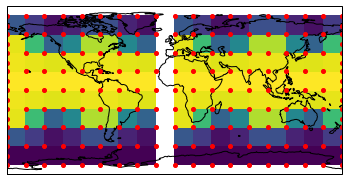

In [16]:
# create sample data
lon, lat, data = sample_data_map(nlons=18, nlats=9)

# this is never displayed!
data[:, -1] = 5

# ====

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

h = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree())

# plot the lat and lon data

lons, lats = np.meshgrid(lon, lat)
ax.plot(lons.flatten(), lats.flatten(), 'o', transform=ccrs.PlateCarree(), ms=4, c='r')

ax.set_global()

In [17]:
lat

array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.,  80.])

Problem is when that data is meant to be at the centroid of the grid cells but pcolormesh interprets it as edge of the data. Also, the interpolation creates its own axis from the calculated values, that's why the axis above are stretching above and in the plot for tutorial...

This could be fixed by passing a second grid with centre of our grid as the edges separately for pcolrmesh

**More info:** There’s actually an interpolation happening, where the function interpolates the original grid to its vertices and thereby shortens the latitude and longitude data by a row and column each. More Info here..
https://bairdlangenbrunner.github.io/python-for-climate-scientists/matplotlib/pcolormesh-grid-fix.html

**Update:** ERA5 doesn't uses data as the centroid unlike probably NCL plotting which is what the guy is comparing to in the above link. So then pcolormesh function performs as the ERA-5 data is meant to as shown [here](https://confluence.ecmwf.int/display/CKB/ERA5%3A+What+is+the+spatial+reference) and in fig below:

In [9]:
Image(url='https://confluence.ecmwf.int/download/attachments/65237704/ERA5-spatial-reference-points-v3.jpg?version=1&modificationDate=1522236862363&api=v2', height=500, width=700)

-------------------------------------------
**So the Temporary Fix below is not need**

**Ignore from here**

# Temporary fix

Adding a shifted grid to give it to pcolormesh with LON amd LAT

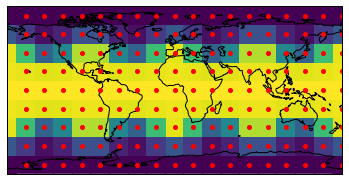

In [15]:
# create sample data
# temporary solution
#source: https://github.com/C2SM/pyvis/blob/master/Part3/ex3_2_mesh.ipynb
lon, lat, data = sample_data_map(18, 9)

# ====

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

LON = np.arange(-10, 351, 20) # we specify the centre of
LAT = np.arange(-90, 91, 20)


h = ax.pcolormesh(LON, LAT, data, transform=ccrs.PlateCarree())

# plot the lat and lon data

lons, lats = np.meshgrid(lon, lat)
#ax.plot(lons.flatten(), lats.flatten(), 'o', transform=ccrs.PlateCarree(), ms=4, c='r')
ax.plot(lons, lats, 'o', transform=ccrs.PlateCarree(), ms=4, c='r')
ax.set_global()


# ====

## General approach from the webpage above

Works for rectangular grid-cells

In [15]:

# extend longitude by 2
lon_extend = np.zeros(lon.size+2)
# fill in internal values
lon_extend[1:-1] = lon # fill up with original values
# fill in extra endpoints
lon_extend[0] = lon[0]-np.diff(lon)[0]
lon_extend[-1] = lon[-1]+np.diff(lon)[-1]
# calculate the midpoints
lon_pcolormesh_midpoints = lon_extend[:-1]+0.5*(np.diff(lon_extend))

# extend latitude by 2
lat_extend = np.zeros(lat.size+2)
# fill in internal values
lat_extend[1:-1] = lat
# fill in extra endpoints
lat_extend[0] = lat[0]-np.diff(lat)[0]
lat_extend[-1] = lat[-1]+np.diff(lat)[-1]
# calculate the midpoints
lat_pcolormesh_midpoints = lat_extend[:-1]+0.5*(np.diff(lat_extend))


# Specifying extent manually? 

using xarray plotting best to not to specify extent of the axes manually

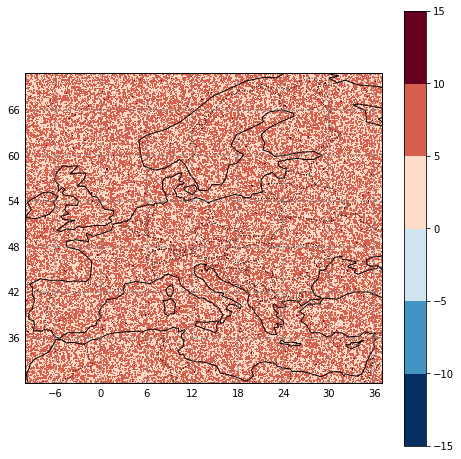

In [17]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())

#setting geographical boundaries of our map using the data provided
#ax.set_extent([min(da_f.lon), max(da_f.lon), min(da_f.lat), max(da_f.lat)])
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.4, linestyle='--')
gl.xlabels_top = False # suppress gridline labels on the top
gl.ylabels_right = False # suppress gridline labels at the right edge

da_f.plot.contourf(ax=ax, transform=ccrs.PlateCarree()) 

## specifying the extent manually 

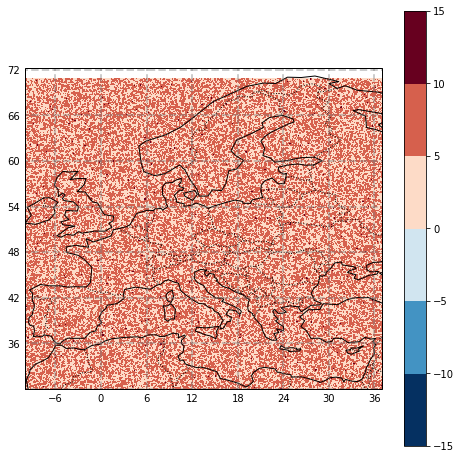

In [18]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())

#setting geographical boundaries of our map using the data provided
ax.set_extent([min(da_f.lon), max(da_f.lon), min(da_f.lat), max(da_f.lat)])
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.4, linestyle='--')
gl.xlabels_top = False # suppress gridline labels on the top
gl.ylabels_right = False # suppress gridline labels at the right edge

da_f.plot.contourf(ax=ax, transform=ccrs.PlateCarree()) 

## what happens with using cartopy plotting

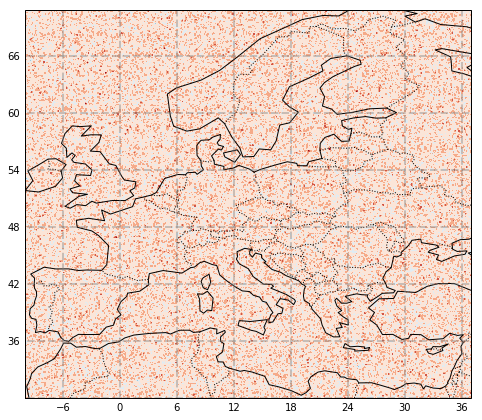

In [20]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())

#setting geographical boundaries of our map using the data provided
#ax.set_extent([min(da_f.lon), max(da_f.lon), min(da_f.lat), max(da_f.lat)])
ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.4, linestyle='--')
gl.xlabels_top = False # suppress gridline labels on the top
gl.ylabels_right = False # suppress gridline labels at the right edge

p = ax.contourf(lons_f, lats_f, data_f, transform=ccrs.PlateCarree(), cmap='RdBu_r')

In [22]:
min(da_f.lat), max(da_f.lat)

(<xarray.DataArray 'lat' ()>
 array(30.)
 Coordinates:
     lat      float64 30.0, <xarray.DataArray 'lat' ()>
 array(70.8)
 Coordinates:
     lat      float64 70.8)

**Conclusion: with both xarray and cartopy, we don't need to set extent mannually and it interprets it fine with for contourf plot but it doesn't work for other plots**

(30, 70.8)

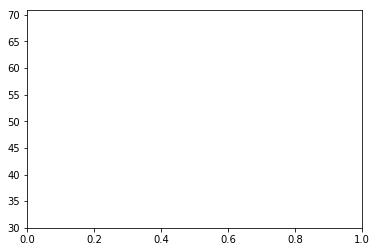

In [23]:
fig = plt.figure()
ax = plt.axes()
ax.set_ylim(30, 70.8)